# Практическая работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 0381 Михайлов Виктор и Прохоров Борис. Вариант №8.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

**Дискретный фильтр** представляет собой ту или иную систему обработки дискретного сигнала, обладающую следующими свойствами: линейность, стационарность и наличие "памяти".

Пусть последовательность $\{x_k\}$ задает дискретный сигнал. Считаем, что $T$ - шаг дискретизации равен единице.

Обозначим выходной сигнал через $\{y_k\}$.

Дискретный фильтр может быть задан в виде:

$$y_k = b_0x_k + b_1x_{k-1} + ... + b_nx_{k-n} - a_1y_{k-1} + a_2y_{k-2} + ... + a_my_{k-m}$$

Если все $a_k = 0$ получим нерекурсивный фильтр, в ином случае - **рекурсивный**. Ограничений на соотношение чисел $n$ и $m$ нет.

**Формула прямоугольников:**

$$y_{n+1} = y_n + s_{n + \frac 1 2}, y_0 = 0, s_n = e^{i \omega n}$$

**Формула трапеций:**

$$y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1}), y_0 = 0$$


**Формула Симпсона:**

$$y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1}),y_0 = 0$$


Передаточная функция $H(\omega)$ - периодическая функция с периодом $2\pi$. Частота рассматриваемого дискретного сигнала не должна превышать $\pi$, поэтому обычно рассматривается интервал $(-\pi, \pi)$ для круговой частоты $\omega$, или $(-0.5,0.5)$ для циклической частоты $f$:

$$H(\omega)=H(2\pi f)=\tilde H(f)$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde {H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

### Импорт необходимых библиотек:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

### 1. Выведем формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона.

Пусть $s_n = e^{i \omega n}, y_n = H(\omega)s_n$

####1.1. Фильтр, соответствующий формуле прямоугольников.

$y_{n+1} = y_n + s_{n + \frac 1 2}$

Тогда $\begin{cases}
   y_{n+1} = H(\omega)e^{i \omega n} + e^{i \omega (n + 0.5)}\\
   y_{n+1} = H(\omega)e^{i \omega (n + 1)}
 \end{cases}$

Приравняв правые части, получим:

$H(\omega) = \frac {e^{0.5 i \omega }} {e^{i \omega} - 1} = \frac {1} {e^{\frac 1 2 i \omega} - e^{- \frac 1 2 i \omega}} = \frac 1 {2i \sin {\frac \omega t}} \Rightarrow \tilde H(f) = \frac 1 {2i \sin {\pi f}}$

####1.2. Фильтр, соответствующий формуле трапеций

$y_{n+1} = y_n + \frac 1 2(s_n + s_{n+1})$

Тогда $\begin{cases}
y_{n+1} = H(\omega)e^{i \omega n} + \frac 1 2 (e^{i \omega n} + e^{i \omega (n + 1)})\\
y_{n+1} = H(\omega)e^{i \omega (n + 1)}
\end{cases}$

Приравняв правые части, получим:

$H(\omega) = \frac {e^{i \omega} + 1} {2(e^{i \omega} - 1)} = \frac {\cos {\frac \omega 2}}{2i \sin {\frac \omega 2}} ⇒ \tilde H(f) = \frac {\cos {\pi f}} {2i \sin {\pi f}}$

####1.3. Фильтр, соответствующий формуле Симпсона

$y_{n+1} = y_{n-1} + \frac 1 3 (s_{n-1} + 4s_n + s_{n+1})$

Тогда $\begin{cases}
  y_{n+1} = H(\omega)e^{i \omega (n-1)} + \frac 1 3 (e^{i \omega (n-1)} + 4e^{i \omega n} + e^{i \omega (n + 1)})\\
  y_{n+1} = H(\omega)e^{i \omega (n + 1)}
\end{cases}$

Приравняв правые части, получим:

$H(\omega) = \frac {e^{-i \omega} + 4 + e^{i \omega}} {3(e^{i \omega} - e^{-i \omega})} = \frac {\cos {\omega} + 2}{3i \sin {\omega}} ⇒ \tilde H(f) = \frac {\cos {2\pi f} + 2} {3i \sin {2 \pi f}}$

### Построим графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному.

Отношение вычисленного к истнинному (фильтрация по формуле прямоугольников):

$\gamma = \frac {\frac \omega 2}{\sin {\frac \omega 2}} = \frac {\pi f}{\sin {\pi f}}$

Отношение вычисленного к истнинному (фильтрация по формуле трапеций):

$\gamma = \cos (\frac \omega 2) \frac {\frac \omega 2}{\sin (\frac \omega 2)} = \cos (\pi f) \frac {\pi f}{\sin (\pi f)}$

Отношение вычисленного к истнинному (фильтрация по формуле Симпсона):

$\gamma = \frac {\cos {\omega} + 2} {3} \cdot \frac {\omega}{\sin {\omega}} = \frac {\cos (2 \pi f) + 2} {3} \cdot \frac {2 \pi f}{\sin (2 \pi f)}$

<ipython-input-37-a956525c3963>:3: RuntimeWarning: divide by zero encountered in divide
  H_rect = lambda f: (1/(2j*np.sin(np.pi*f))).imag
<ipython-input-37-a956525c3963>:3: RuntimeWarning: invalid value encountered in divide
  H_rect = lambda f: (1/(2j*np.sin(np.pi*f))).imag
<ipython-input-37-a956525c3963>:6: RuntimeWarning: divide by zero encountered in divide
  H_trap = lambda f: (np.cos(np.pi*f)/(2j*np.sin(np.pi*f))).imag
<ipython-input-37-a956525c3963>:6: RuntimeWarning: invalid value encountered in divide
  H_trap = lambda f: (np.cos(np.pi*f)/(2j*np.sin(np.pi*f))).imag
<ipython-input-37-a956525c3963>:9: RuntimeWarning: divide by zero encountered in divide
  H_simpson = lambda f: ((np.cos(2*np.pi*f)+2)/(3j*np.sin(2*np.pi*f))).imag
<ipython-input-37-a956525c3963>:9: RuntimeWarning: invalid value encountered in divide
  H_simpson = lambda f: ((np.cos(2*np.pi*f)+2)/(3j*np.sin(2*np.pi*f))).imag


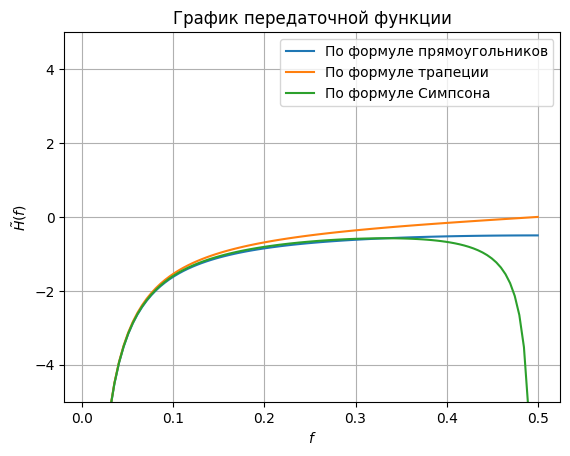

<ipython-input-37-a956525c3963>:4: RuntimeWarning: invalid value encountered in divide
  gamma_rect = lambda f: np.pi*f/np.sin(np.pi*f)
<ipython-input-37-a956525c3963>:7: RuntimeWarning: invalid value encountered in divide
  gamma_trap = lambda f: np.cos(np.pi*f)*np.pi*f/np.sin(np.pi*f)
<ipython-input-37-a956525c3963>:10: RuntimeWarning: invalid value encountered in divide
  gamma_simpson = lambda f: ((2+np.cos(2*np.pi*f))*2*np.pi*f)/(3*np.sin(2*np.pi*f))


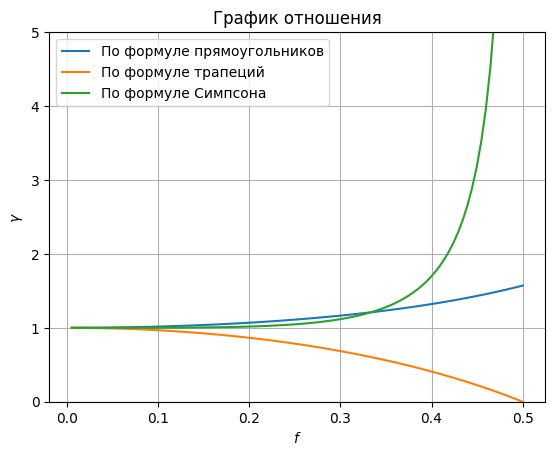

In [ ]:
f = np.linspace(0, 0.5, 100)

H_rect = lambda f: (1/(2j*np.sin(np.pi*f))).imag
gamma_rect = lambda f: np.pi*f/np.sin(np.pi*f)

H_trap = lambda f: (np.cos(np.pi*f)/(2j*np.sin(np.pi*f))).imag
gamma_trap = lambda f: np.cos(np.pi*f)*np.pi*f/np.sin(np.pi*f)

H_simpson = lambda f: ((np.cos(2*np.pi*f)+2)/(3j*np.sin(2*np.pi*f))).imag
gamma_simpson = lambda f: ((2+np.cos(2*np.pi*f))*2*np.pi*f)/(3*np.sin(2*np.pi*f))

plt.title('График передаточной функции')
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f)$')
plt.grid()
plt.plot(f, H_rect(f), label='По формуле прямоугольников')
plt.plot(f, H_trap(f), label='По формуле трапеции')
plt.plot(f, H_simpson(f), label='По формуле Симпсона')
plt.ylim(-5, 5)
plt.legend()
plt.show()

plt.title('График отношения')
plt.xlabel('$f$')
plt.ylabel(r'$γ$')
plt.grid()
plt.plot(f, gamma_rect(f), label='По формуле прямоугольников')
plt.plot(f, gamma_trap(f), label='По формуле трапеций')
plt.plot(f, gamma_simpson(f), label='По формуле Симпсона')
plt.ylim(0, 5)
plt.legend()
plt.show()


### Интерпретация частотных свойств полученных передаточных функций

- Как в случае формулы прямоугольников, так и в случае формулы трапеций полосой пропускания являются частоты $>=~0.2$

- Полоса пропускания в случае формулы Симпсона находится в диапазоне примерно от $0.2$ до $0.4$

- Формула трапеций позволяет подавлять высокие частоты

- Формулы прямоугольника и Симсона усиливают высокие частоты

### 2. Выведем формулу передаточной функции рекурсивнго фильтра для интегрирования «по правилу 3/8».

Вновь пусть $s_n = e^{i \omega n}, y_n = H(\omega)e^{i \omega n}$:

Фильтр, соответствующий квадратурной формуле «по правилу 3/8»:

$y_{n+2} = y_{n-1} + \frac 1 8 (s_{n+2} + 3s_{n+1} + 3s_n + s_{n-1})$.

Тогда $\begin{cases}
  y_{n+2} = H(\omega)e^{i \omega (n-1)} + \frac 1 8 (e^{i \omega (n+2)} + 3e^{i \omega (n+1)} + 3e^{i \omega n} + e^{i \omega (n - 1)})\\
  y_{n+2} = H(\omega)e^{i \omega (n + 2)}
\end{cases}$<br>

Приравняв правые части, получим:

$H(\omega) = \frac {e^{2i \omega} + 3e^{i \omega} + 3 + e^{- i \omega}}{8 (e^{2 i \omega} - e^{- i \omega})} \cdot \frac {e^{- \frac {i\omega}{2}}}{e^{- \frac {i\omega}{2}}} = \frac {e^{\frac {3i\omega}{2}} + 3e^{\frac {i\omega}{2}} + 3e^{- \frac {i\omega}{2}} + e^{- \frac {3i\omega}{2}}}{8 (e^{\frac {3i\omega}{2}} -\ e^{- \frac {3i\omega}{2}})} = \frac {2 \cos {(\frac {3\omega} 2)} + 6 \cos{(\frac \omega 2)}}{16 i \sin (\frac {3\omega} 2)} ⇒ $

$⇒\tilde H (f) = \frac {\cos {(3 \pi f)} + 3 \cos{(\pi f)}}{8 i \sin (3 \pi f)}$

###Построим график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному.

Отношение вычисленного к истнинному:

$\gamma = \frac {\text {Вычисленное}}{\text {Истинное}} = \frac 1 {12} (\cos {(\frac {3\omega} 2)} + 3 \cos{(\frac \omega 2)}) \cdot \frac {\frac {3\omega}{2}}{\sin (\frac {3\omega}{2})} = \frac 1 {12} (\cos {(3 \pi f)} + 3 \cos{(\pi f)}) \cdot \frac {3 \pi f}{\sin (3 \pi f)}$

<ipython-input-34-b8dae059235a>:1: RuntimeWarning: divide by zero encountered in divide
  H_3_8_rule = lambda f: ((np.cos(3*np.pi*f)+3*np.cos(np.pi*f))/(8j*np.sin(3*np.pi*f))).imag
<ipython-input-34-b8dae059235a>:1: RuntimeWarning: invalid value encountered in divide
  H_3_8_rule = lambda f: ((np.cos(3*np.pi*f)+3*np.cos(np.pi*f))/(8j*np.sin(3*np.pi*f))).imag


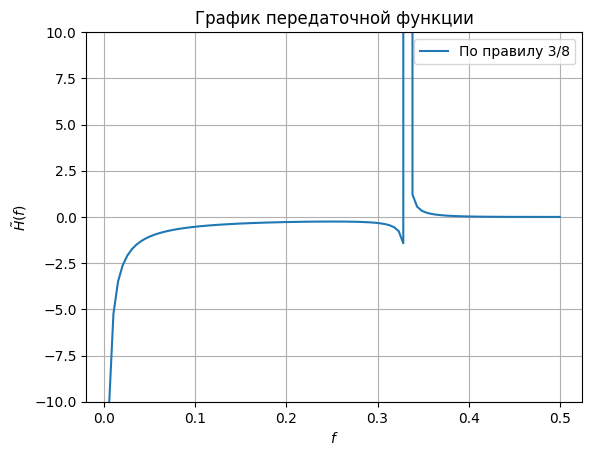

<ipython-input-34-b8dae059235a>:2: RuntimeWarning: invalid value encountered in divide
  gamma_3_8_rule = lambda f: (np.cos(3*np.pi*f) + 3*np.cos(np.pi*f))*(3*np.pi*f) / np.sin(3*np.pi*f) / 12


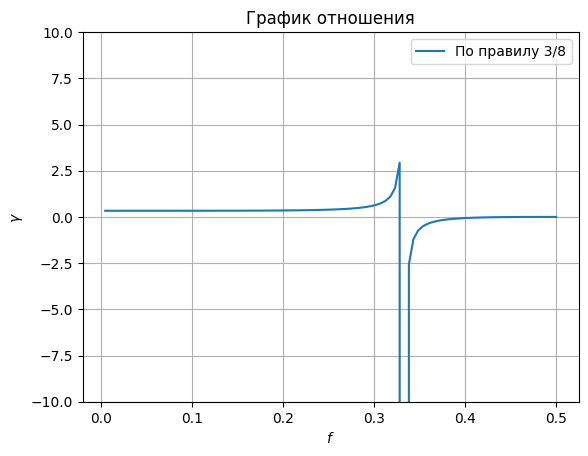

In [ ]:
H_3_8_rule = lambda f: ((np.cos(3*np.pi*f)+3*np.cos(np.pi*f))/(8j*np.sin(3*np.pi*f))).imag
gamma_3_8_rule = lambda f: (np.cos(3*np.pi*f) + 3*np.cos(np.pi*f))*(3*np.pi*f) / np.sin(3*np.pi*f) / 12

plt.title('График передаточной функции')
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f)$')
plt.grid()
plt.plot(f, H_3_8_rule(f), label='По правилу 3/8')
plt.ylim(-10, 10)
plt.legend()
plt.show()

plt.title('График отношения')
plt.xlabel('$f$')
plt.ylabel(r'$γ$')
plt.grid()
plt.plot(f, gamma_3_8_rule(f), label='По правилу 3/8')
plt.ylim(-10, 10)
plt.legend()
plt.show()

### Интерпретация частотных свойств полученной передаточной функции

- Полосой пропускания в случае правила 3/8 является диапазон от $0.1$ до $0.3$ и после ~$0.35$

- Почти никакие частоты не подавляются и не усиливаются

###3. Проведём сравнительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

В п.1 для передаточных функций характерна монотонная зависимость между частотой и усилением/подавлением сигнала. В п.2 приведено «правило 3/8», при котором усиление или подавление сигнала происходит резко в узких диапазонах частот, а монотонной зависимости, как в п.1 не наблюдается.

## Выводы

В ходе выполнения практической работы были выведены формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций, Симпсона и для интегрирования «по правилу 3/8». Построены графики передаточных функций и отношения вычисляемого в результате фильтрации значения к истинному. Были проинтерпретированы частотные свойства полученных передаточных функций, а также проведён их сопоставительный анализ.